# **1. 목표(가설) 설정**

*  분석범위: 2021년의 '다잇다' 고객의 구매 이력 데이터
*  분석목표: 데이터 분석을 통해 고객의 추가 구매 유도 방안 수립
*  분석도구: 파이썬
*  기대효과: 다음 해 판매수익률 10% 예상 및 기존고객 유지


# **2. 데이터 선정 및 분석**

**1) 데이터 수집**

- "online_commerce_data.csv"라는 고객의 인적/구매 이력 정보를 담고 있는 데이터 사용
  -  customer_no : 고객번호 (고객 식별 값, 보통 고유함) 고객번호의 앞 여섯 자리는 고객의 가입연월을 의미함 (eg. 2019073300103 고객의 가입연월은 2019-07)
  * age : 고객 연령
  * gender : 고객 성별 (1 : 남성, 2 : 여성, 9 : 성별 알 수 없음)
  * order_no : 주문 번호
  * order_date : 주문 일자
  * channel : 주문 채널 (TV, Mobile)
  * item_category : 아이템 카테고리
  * item_code : 아이템 코드
  * item_name : 아이템명
  * price : 판매가
  * qty : 주문 수량
  * order_amount : 주문 금액
  * discount_amount : 할인 금액
  * paid_amount : 고객 결제 금액


**2) EDA(탐색적 데이터 분석) 및 데이터 정제 실시**

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/opentype/mathjax: caching, new cache contents: 24 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/truetype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/glyphicons: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 d

In [7]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/1. 바이트디그리 데이터분석 2기/class02/data/online_commerce_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147311 entries, 0 to 147310
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_no      147311 non-null  int64  
 1   age              147273 non-null  float64
 2   gender           147311 non-null  int64  
 3   order_no         147311 non-null  int64  
 4   order_date       147311 non-null  object 
 5   channel          147311 non-null  object 
 6   item_category    147311 non-null  object 
 7   item_code        147311 non-null  int64  
 8   item_name        147311 non-null  object 
 9   price            147311 non-null  int64  
 10  qty              147311 non-null  int64  
 11  order_amount     147311 non-null  int64  
 12  discount_amount  147311 non-null  int64  
 13  paid_amount      147311 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 15.7+ MB


In [8]:
df.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
0,2021059651101,68.0,9,202106072433746,2021/06/07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910
1,2018069800502,49.0,2,202105311957155,2021/05/31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000
2,2019073300103,35.0,1,202105138020462,2021/05/13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400
3,2020075283364,41.0,9,202106171444319,2021/06/17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080
4,2020104780765,46.0,1,202106024431989,2021/06/02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610


In [9]:
# 전체 데이터의 Row와 Column개수 출력
print('df :', df.shape)

df : (147311, 14)


In [10]:
# 결측치 확인
df.isnull().sum()

customer_no         0
age                38
gender              0
order_no            0
order_date          0
channel             0
item_category       0
item_code           0
item_name           0
price               0
qty                 0
order_amount        0
discount_amount     0
paid_amount         0
dtype: int64

In [11]:
# 결측치를 제거하고자 평균으로 대체
mean_age = df['age'].mean()
df['age'].fillna(mean_age, inplace=True)

df.isnull().sum()

customer_no        0
age                0
gender             0
order_no           0
order_date         0
channel            0
item_category      0
item_code          0
item_name          0
price              0
qty                0
order_amount       0
discount_amount    0
paid_amount        0
dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [13]:
# 날짜 데이터 확인
df["order_date"].unique()

array(['2021/06/07', '2021/05/31', '2021/05/13', '2021/06/17',
       '2021/06/02', '2021/02/08', '2021/04/28', '2021/03/29',
       '2021/01/21', '2021/04/26', '2021/01/18', '2021/02/28',
       '2021/03/06', '2021/06/23', '2021/02/09', '2021/03/01',
       '2021/04/22', '2021/03/22', '2021/05/10', '2021/03/18',
       '2021/01/09', '2021/01/13', '2021/05/03', '2021/05/02',
       '2021/04/10', '2021/05/26', '2021/04/09', '2021/02/12',
       '2021/05/20', '2021/03/17', '2021/01/20', '2021/04/20',
       '2021/06/11', '2021/01/06', '2021/06/10', '2021/04/01',
       '2021/03/26', '2021/05/05', '2021/03/12', '2021/05/09',
       '2021/06/01', '2021/03/03', '2021/03/20', '2021/04/06',
       '2021/02/01', '2021/04/05', '2021/04/03', '2021/06/04',
       '2021/02/14', '2021/04/17', '2021/05/01', '2021/04/19',
       '2021/06/08', '2021/03/16', '2021/01/24', '2021/05/24',
       '2021/04/11', '2021/04/21', '2021/06/24', '2021/05/14',
       '2021/06/14', '2021/05/27', '2021/04/23', '2021/

In [14]:
# 날짜 열의 첫 번째 값 확인
print(df['order_date'].iloc[0])

2021/06/07


In [15]:
## 날짜 포맷을 %Y/%m/%d 형식으로 지정.
df['order_date'] = pd.to_datetime(df["order_date"], format='%Y/%m/%d')
df.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
0,2021059651101,68.0,9,202106072433746,2021-06-07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910
1,2018069800502,49.0,2,202105311957155,2021-05-31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000
2,2019073300103,35.0,1,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400
3,2020075283364,41.0,9,202106171444319,2021-06-17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080
4,2020104780765,46.0,1,202106024431989,2021-06-02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610


In [16]:
# 날짜 열의 첫 번째 값 확인
print(df['order_date'].iloc[0])

2021-06-07 00:00:00


In [17]:
from datetime import timedelta
import time

df.insert(loc=5, column ='month', value=df.order_date.dt.month)
df.insert(loc=6, column ='day', value=df.order_date.dt.day)
df.insert(loc=7, column='weekday', value=df['order_date'].dt.day_name())
df.head()

,customer_no,age,gender,order_no,order_date,month,day,weekday,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
0,2021059651101,68.0,9,202106072433746,2021-06-07,6,7,Monday,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910
1,2018069800502,49.0,2,202105311957155,2021-05-31,5,31,Monday,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000
2,2019073300103,35.0,1,202105138020462,2021-05-13,5,13,Thursday,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400
3,2020075283364,41.0,9,202106171444319,2021-06-17,6,17,Thursday,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080
4,2020104780765,46.0,1,202106024431989,2021-06-02,6,2,Wednesday,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610


In [18]:
# 한글 폰트 설정
plt.rc('font', family = 'NanumBarunGothic')

In [19]:
# 데이터의 날짜 범위를 확인하였으며, 마지막 주문일자가 2021년 6월 24일임을 알 수 있었음.
print(df['order_date'].min())
print(df['order_date'].max())

2021-01-01 00:00:00
2021-06-24 00:00:00


In [20]:
pd.pivot_table(df, index='gender', columns = 'item_category', values=['paid_amount'],aggfunc='sum')

paid_amount                                                      \
item_category     가구/인테리어          건강식품       남성의류          대형가전       레저/스포츠   
gender                                                                          
1              33277860.0  1.174984e+09  2040910.0  2.077010e+09   32632790.0   
2              92327030.0  9.449796e+08  2909370.0  1.570467e+09   32167260.0   
9              63882670.0  1.040690e+09  1088760.0  2.114880e+08  223901260.0   

                                                                              \
item_category        레포츠패션       반려용품           뷰티         상품권          생활가전   
gender                                                                         
1              174404840.0    98000.0  364464567.0  20205100.0  1.134847e+09   
2              390353360.0   602500.0  415380270.0    882700.0  1.082513e+09   
9              132548750.0  1022370.0  244077860.0   3986700.0  1.102451e+08   

               ...                                                    \
item_category  ...         언더웨어         여성의류        여행          일반식품   
gender         ...                                                     
1              ...   46515845.0   25839750.0       NaN  2.751492e+08   
2              ...  181396920.0  206055020.0  316500.0  6.422726e+08   
9              ...   56769760.0   49435820.0  421900.0  1.052138e+09   

                                                                             \
item_category         주방가전        주방용품          침구          캐쥬얼      키즈/유아동   
gender                                                                        
1              125096720.0  14434890.0   2313655.0   30265590.0   4630740.0   
2              123143980.0  79618480.0  12030500.0  120444840.0  15802070.0   
9               39821930.0  35540120.0   7436320.0   38372290.0  27282720.0   

                            
item_category         패션잡화  
gender                      
1              330155380.0  
2              522807840.0  
9              321382060.0  

[3 rows x 21 columns]

In [21]:
df.groupby("gender").count()['customer_no']

gender
1    42527
2    79432
9    25352
Name: customer_no, dtype: int64

In [22]:
# 'paid_amount' 열의 데이터 유형 확인
print(df['paid_amount'].dtype)

int64


In [23]:
result = df.groupby("gender")['paid_amount'].sum()
result_formatted = result.apply(lambda x: "{:,.0f}".format(x))
print(result_formatted)

gender
1    5,931,872,650
2    6,645,034,520
9    3,740,194,650
Name: paid_amount, dtype: object


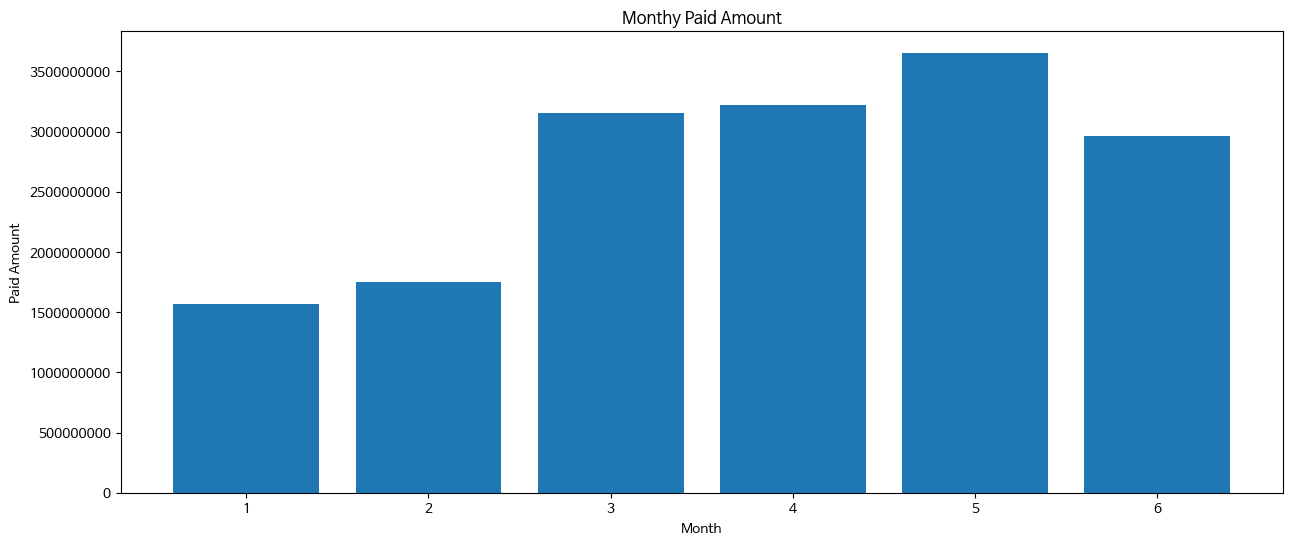

In [24]:
# 월별 고객 지불액을 막대그래프 시각화
df_bar_month = df.groupby('month')['paid_amount'].sum().reset_index()

## 그림의 크기 설정
plt.figure(figsize=(15, 6))

## 막대 그래프로 월별 거래액 표현
plt.bar(df_bar_month['month'], df_bar_month['paid_amount'])

## 그래프 타이틀 및 축 레이블
plt.title('Monthy Paid Amount')
plt.xlabel('Month')
plt.ylabel('Paid Amount')

# y 축 값을 지수 형태가 아닌 전체 자릿수가 보이는 형태로 표시
plt.ticklabel_format(axis='y', style='plain')

## x 축에 월별 값 표시
plt.xticks(df_bar_month['month'])

## 그래프 출력
plt.show()

In [25]:
# 그룹화 후 count 연산 수행
grouped_counts = df.groupby("month").count()['customer_no']

# 천 단위 구분 기호 추가
counts_formatted = grouped_counts.apply(lambda x: "{:,.0f}".format(x))

# 결과 출력
counts_formatted

month
1    13,328
2    19,002
3    28,206
4    32,541
5    30,750
6    23,484
Name: customer_no, dtype: object

In [26]:
result_month = df.groupby("month")['paid_amount'].sum()
result_formatmonth = result_month.apply(lambda x: "{:,.0f}".format(x))
print(result_formatmonth)

month
1    1,568,846,572
2    1,750,861,535
3    3,157,449,625
4    3,223,620,986
5    3,654,812,395
6    2,961,510,707
Name: paid_amount, dtype: object


In [27]:
pd.pivot_table(df, index='month', columns = 'item_category', values=['paid_amount'],aggfunc='sum')

paid_amount                                                     \
item_category     가구/인테리어         건강식품       남성의류          대형가전       레저/스포츠   
month                                                                          
1              26057740.0  149786440.0  1003610.0  8.493452e+07    5240230.0   
2              30534010.0  248443270.0   856320.0  3.169372e+08    7115950.0   
3              28010930.0  536300740.0   422540.0  7.043966e+08   13940240.0   
4              27876280.0  872753900.0   940370.0  7.155821e+08   17553730.0   
5              36154760.0  840019190.0  1677770.0  1.077331e+09   76511920.0   
6              40853840.0  513349790.0  1138430.0  9.597837e+08  168339240.0   

                                                                           \
item_category        레포츠패션      반려용품           뷰티        상품권         생활가전   
month                                                                       
1               70697640.0   94180.0  155124610.0  2968200.0  358639690.0   
2              108130720.0  168950.0  133349980.0  2880900.0  345410100.0   
3              189803470.0  934760.0  109149092.0  4326200.0  509574630.0   
4              157559320.0  160820.0  135933170.0  4714200.0  387035800.0   
5              108928070.0  266270.0  302989575.0  6663900.0  485956670.0   
6               62187730.0   97890.0  187376270.0  3521100.0  240988080.0   

               ...                                                             \
item_category  ...        언더웨어        여성의류        여행         일반식품        주방가전   
month          ...                                                              
1              ...  34152570.0  27416440.0       NaN  431837282.0  34062490.0   
2              ...  31295480.0  28117850.0  711600.0  192947815.0  68242510.0   
3              ...  64595570.0  78871730.0   12900.0  476689223.0  76420210.0   
4              ...  56610010.0  76251670.0       NaN  331155936.0  55183520.0   
5              ...  49458435.0  38867230.0       NaN  186154080.0  39588430.0   
6              ...  48570460.0  31805670.0   13900.0  350774982.0  14565470.0   

                                                                           
item_category        주방용품         침구         캐쥬얼      키즈/유아동         패션잡화  
month                                                                      
1              21541430.0  1694570.0  30988670.0   2320480.0   78436700.0  
2              19837440.0  2108580.0  20003930.0   7999320.0  142481140.0  
3              19634860.0  6525330.0  14581290.0  10987090.0  245679610.0  
4              16811320.0  4048870.0  37983150.0   9443520.0  250279040.0  
5              13316130.0  2789980.0  46115570.0  10224080.0  261481890.0  
6              38452310.0  4613145.0  39410110.0   6741040.0  195986900.0  

[6 rows x 21 columns]

* 5월에 고객 구매와 금액이 가장 많았음
* 1월에 고객 결제금액이 가장 적었음



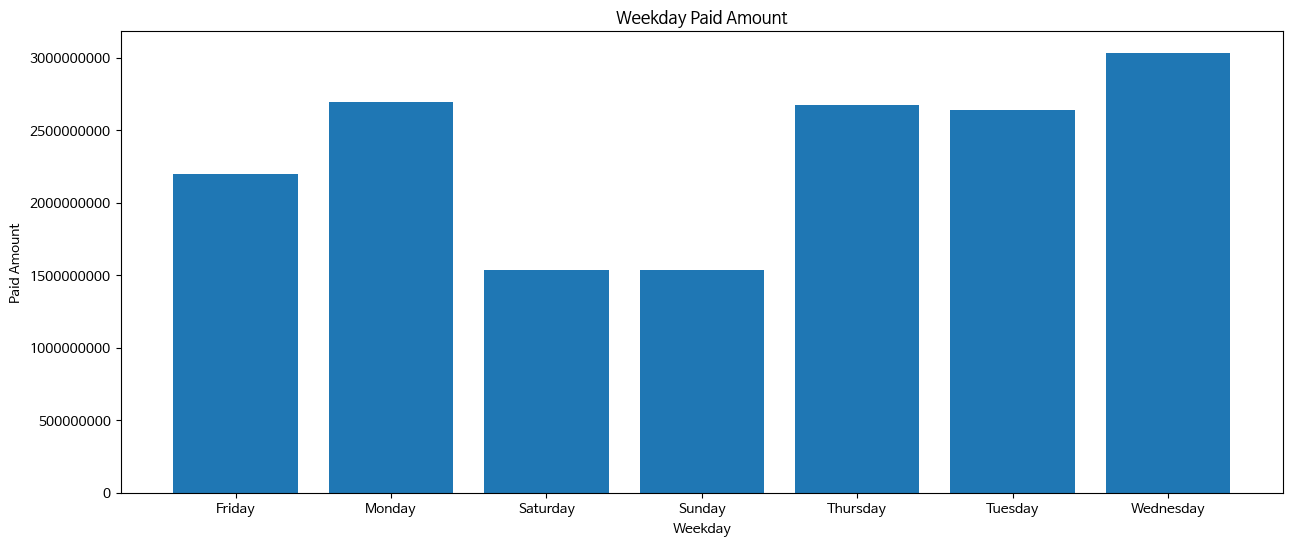

In [28]:
# 요일별 고객 결제 금액을 보기 위해 막대그래프 시각화
df_bar_weekday = df.groupby('weekday')['paid_amount'].sum().reset_index()

## 그림의 크기 설정
plt.figure(figsize=(15, 6))

## 막대 그래프로 요일별 거래액 표현
plt.bar(df_bar_weekday['weekday'], df_bar_weekday['paid_amount'])

## 그래프 타이틀 및 축 레이블
plt.title('Weekday Paid Amount')
plt.xlabel('Weekday')
plt.ylabel('Paid Amount')

# y 축 값을 지수 형태가 아닌 전체 자릿수가 보이는 형태로 표시
plt.ticklabel_format(axis='y', style='plain')

## x 축에 연도 값 표시
plt.xticks(df_bar_weekday['weekday'])

## 그래프 출력
plt.show()

In [29]:
# 그룹화 후 count 연산 수행
group_count = df.groupby("weekday").count()['customer_no']

# 천 단위 구분 기호 추가하여 포맷팅
group_count_format = group_count.apply(lambda x: "{:,.0f}".format(x))

# 결과 출력
print(group_count_format)

weekday
Friday       17,394
Monday       22,668
Saturday     20,540
Sunday       15,824
Thursday     22,909
Tuesday      22,716
Wednesday    25,260
Name: customer_no, dtype: object


In [30]:
#그룹화하여 sum
group_sumweek = df.groupby("weekday")['paid_amount'].sum()

#천 단위 포맷팅
group_sumseek_format = group_sumweek.apply(lambda x: "{:,.0f}".format(x))

#결과 출력
group_sumseek_format

weekday
Friday       2,200,390,100
Monday       2,692,594,970
Saturday     1,538,551,610
Sunday       1,539,479,450
Thursday     2,671,418,010
Tuesday      2,639,986,000
Wednesday    3,034,681,680
Name: paid_amount, dtype: object

In [31]:
pd.pivot_table(df, index='weekday', columns = 'item_category', values=['paid_amount'],aggfunc='sum')

paid_amount                                                   \
item_category     가구/인테리어         건강식품       남성의류         대형가전      레저/스포츠   
weekday                                                                      
Friday         25827730.0  283702210.0  1004580.0  570525490.0  61833210.0   
Monday         25082350.0  524067850.0   257630.0  768229080.0  52492040.0   
Saturday       25654400.0  473765390.0   916670.0  187133210.0  13899730.0   
Sunday         33998280.0  333270890.0   615810.0  457670370.0   2041410.0   
Thursday       27689240.0  448585900.0   815890.0  591195130.0  85298980.0   
Tuesday        24031470.0  531249710.0  1375530.0  668462040.0  30024640.0   
Wednesday      27204090.0  566011380.0  1052930.0  615750040.0  43111300.0   

                                                                           \
item_category        레포츠패션      반려용품           뷰티        상품권         생활가전   
weekday                                                                     
Friday          92156510.0   94630.0  194203110.0  3870300.0  356272660.0   
Monday          79911990.0  205890.0  138192937.0  4714200.0  460268450.0   
Saturday       117095530.0  114760.0  155537340.0  2386200.0  114629810.0   
Sunday          95946600.0  158160.0   92112730.0  1251300.0  135565680.0   
Thursday        88675450.0  144640.0  152101310.0  4840300.0  363789410.0   
Tuesday         86613360.0  463450.0  120410570.0  4238900.0  441908210.0   
Wednesday      136907510.0  541340.0  171364700.0  3773300.0  455170750.0   

               ...                                                             \
item_category  ...        언더웨어        여성의류        여행         일반식품        주방가전   
weekday        ...                                                              
Friday         ...  34296480.0  54500390.0  711600.0  204595650.0  50744600.0   
Monday         ...  37184150.0  34545890.0       NaN  199936628.0  69996860.0   
Saturday       ...  53687600.0  36687270.0       NaN  136967060.0  15741890.0   
Sunday         ...  45800320.0  18471510.0       NaN  109325880.0  15084450.0   
Thursday       ...  36002300.0  57616850.0   12900.0  433510090.0  49448440.0   
Tuesday        ...  37354855.0  35381790.0   13900.0  297532870.0  45450930.0   
Wednesday      ...  40356820.0  44126890.0       NaN  587691140.0  41595460.0   

                                                                          
item_category        주방용품         침구         캐쥬얼     키즈/유아동         패션잡화  
weekday                                                                   
Friday         12267720.0  4232640.0  32111710.0  5497260.0  174586710.0  
Monday         10499480.0  3355440.0  27024840.0  8671850.0  203929600.0  
Saturday       11087710.0  2176630.0  27188920.0  4564340.0  118618920.0  
Sunday         15861130.0  3368870.0  15758770.0  6676160.0   81116270.0  
Thursday       46780740.0  2540870.0  32310590.0  7604120.0  182590470.0  
Tuesday        13094650.0  2006925.0  25573490.0  6942780.0  232972570.0  
Wednesday      20002060.0  4099100.0  29114400.0  7759020.0  180530740.0  

[7 rows x 21 columns]

* 수요일에 고객들이 많은 금액을 지불하였음을 알 수 있었음
* 주말(토, 일)은 거의 수요일 구매액의 절반 정도였음


In [32]:
# 할인율이 얼마나 되는지 추가로 살펴보고자 파생변수('discount_rate')를 생성

df['discount_rate'] = ((df['order_amount'] - df['paid_amount']) / df['order_amount']) * 100

In [33]:
df.head()

,customer_no,age,gender,order_no,order_date,month,day,weekday,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,discount_rate
0,2021059651101,68.0,9,202106072433746,2021-06-07,6,7,Monday,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910,10.000000
1,2018069800502,49.0,2,202105311957155,2021-05-31,5,31,Monday,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000,2.564103
2,2019073300103,35.0,1,202105138020462,2021-05-13,5,13,Thursday,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,19.166667
3,2020075283364,41.0,9,202106171444319,2021-06-17,6,17,Thursday,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080,30.638655
4,2020104780765,46.0,1,202106024431989,2021-06-02,6,2,Wednesday,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610,4.989107


In [34]:
# 누적 막대그래프 시각화를 위한 데이터 가공
df_bar_item_store = df.groupby(['weekday','item_category', 'item_name'])['paid_amount'].sum().reset_index()
df_bar_item_store

,weekday,item_category,item_name,paid_amount
0,Friday,가구/인테리어,DIY반제품,1593600
1,Friday,가구/인테리어,가죽소파(2-3인용),173000
2,Friday,가구/인테리어,게이밍의자,1113100
3,Friday,가구/인테리어,기타 생활/잡화,5000
4,Friday,가구/인테리어,돌/흙/기능성 침대,2101400
...,...,...,...,...
5860,Wednesday,패션잡화,통굽/웨지,41320
5861,Wednesday,패션잡화,티셔츠,277530
5862,Wednesday,패션잡화,패딩부츠,79600
5863,Wednesday,패션잡화,패션가발,5580


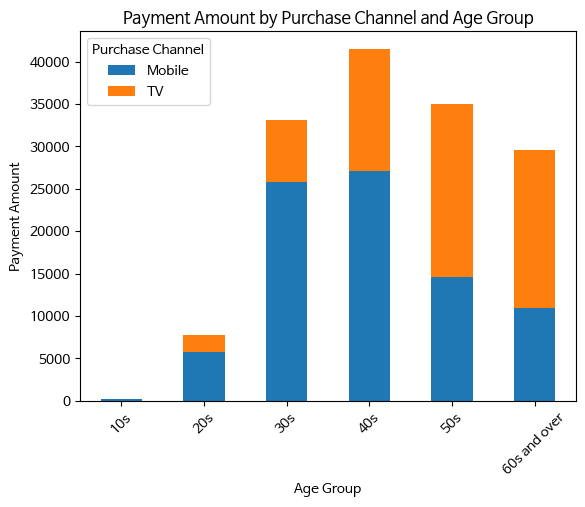

In [35]:
# 연령대 그룹 설정
def get_age_group(age):
    if age < 20:
        return '10s'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return '60s and over'

# 연령대 그룹 추가
df['age_group'] = df['age'].apply(get_age_group)

# 연령대 그룹별로 구매 채널에서의 지불 금액 집계
grouped = df.groupby(['age_group', 'channel'])['paid_amount'].size().unstack()

# 막대 그래프로 시각화
grouped.plot(kind='bar', stacked=True)
plt.title('Payment Amount by Purchase Channel and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Payment Amount')
plt.xticks(rotation=45)
plt.legend(title='Purchase Channel')
plt.show()

In [36]:
df.groupby("age_group").count()['customer_no']

age_group
10s               240
20s              7772
30s             33176
40s             41535
50s             34972
60s and over    29616
Name: customer_no, dtype: int64

In [37]:
# channel이 'Mobile'인 행만 필터링
mobile_rows = df[df['channel'] == 'Mobile']

# age_group으로 그룹화하여 개수 세기
mobile_by_age_group = mobile_rows.groupby('age_group').size()

print(mobile_by_age_group)

age_group
10s               217
20s              5796
30s             25784
40s             27114
50s             14591
60s and over    10905
dtype: int64


In [38]:
# channel이 'Mobile'인 행만 필터링
tv_rows = df[df['channel'] == 'TV']

# age_group으로 그룹화하여 개수 세기
tv_by_age_group = tv_rows.groupby('age_group').size()

print(tv_by_age_group)

age_group
10s                23
20s              1976
30s              7392
40s             14421
50s             20381
60s and over    18711
dtype: int64


*   연령대별 전체 구매경향을 보면 40대의 구매가 많았으며, 50대, 30대, 60대 이상 순이었음.
*   연령대별 구매방식을 살펴보면 10대, 20대, 30대, 40대는 모바일 구매를 선호하고, 50대와 60대 이상 TV 구매르 선호하는 경향이 있음



In [39]:
plt.rcParams['font.family']

['NanumBarunGothic']

<Figure size 1200x800 with 0 Axes>

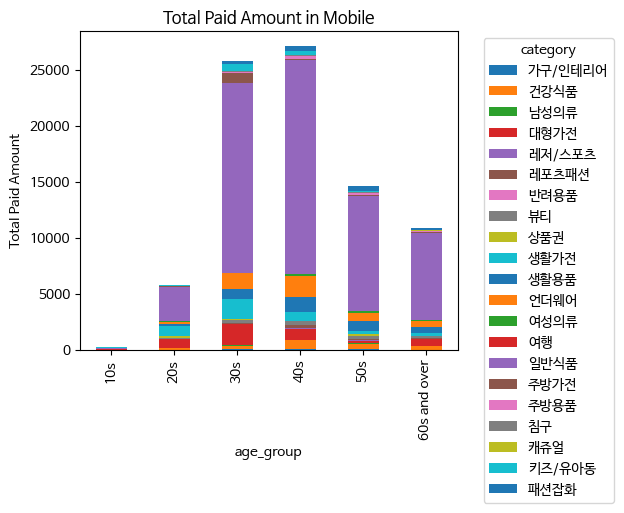

In [40]:
# 모바일 채널에서 연령대별 구매 확인하기 위해
order_ch = df[df['channel'] == 'Mobile']

# 도시별로 개별 변수에 대한 카테고리별 취소된 주문의 총 수를 계산합니다.
order_ch_count = order_ch.groupby(['age_group'])['item_category'].value_counts()

# 막대 그래프로 시각화합니다.
plt.figure(figsize=(12, 8))
order_ch_count.unstack().plot(kind="bar", stacked=True)

plt.xlabel("age_group")
plt.ylabel("Total Paid Amount")
plt.title("Total Paid Amount in Mobile")
plt.legend(title='category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

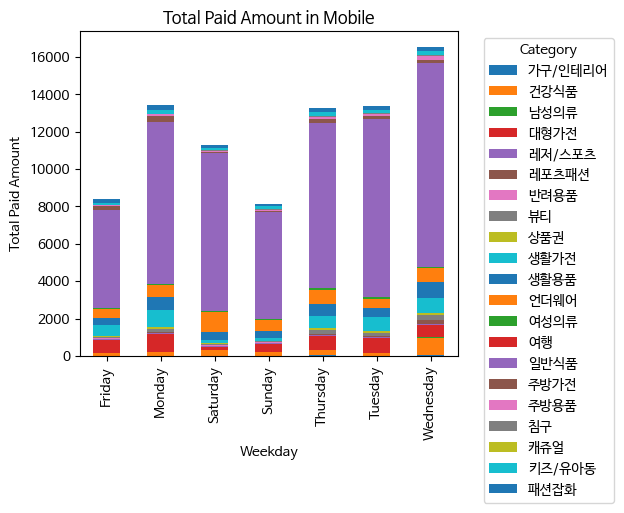

In [41]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 나눔바른고딕 폰트 설정

# 모바일 채널에서 연령대별 구매 확인하기 위해
order_ch = df[df['channel'] == 'Mobile']

# 도시별로 개별 변수에 대한 카테고리별 취소된 주문의 총 수를 계산합니다.
order_ch_count = order_ch.groupby(['weekday'])['item_category'].value_counts()

# 막대 그래프로 시각화합니다.
plt.figure(figsize=(12, 8))
order_ch_count.unstack().plot(kind="bar", stacked=True)

plt.xlabel("Weekday")
plt.ylabel("Total Paid Amount")
plt.title("Total Paid Amount in Mobile")
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

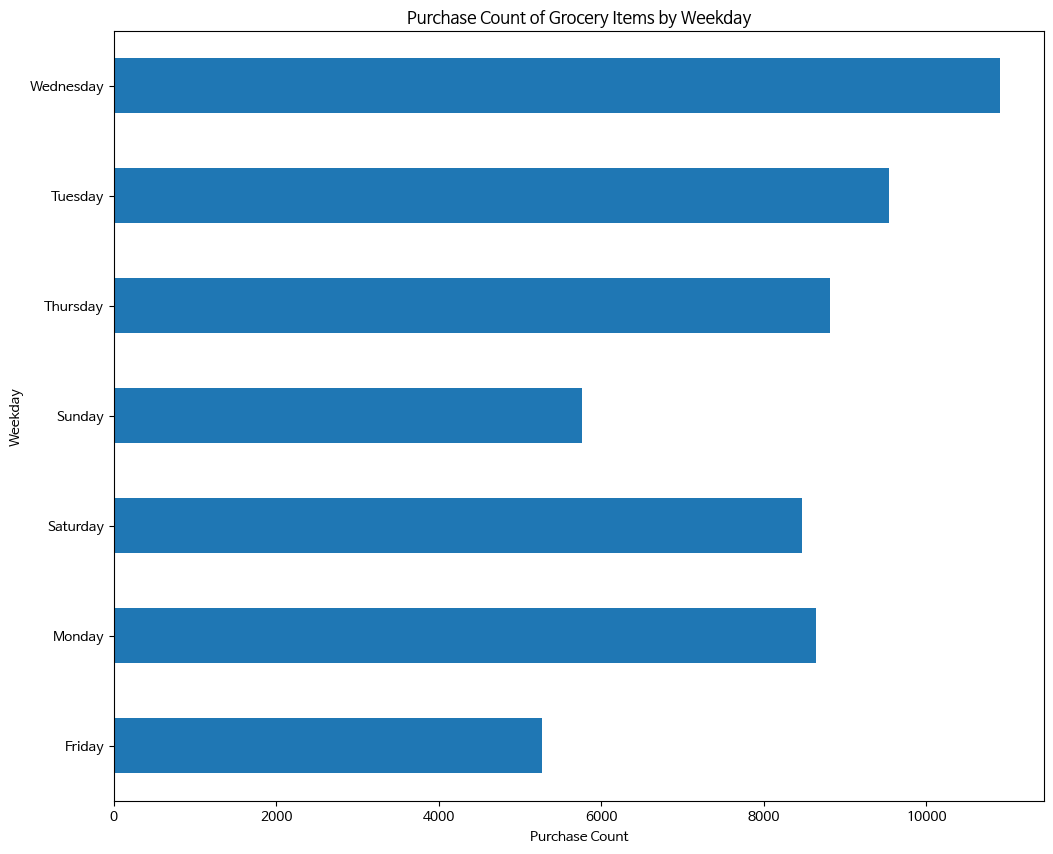

In [42]:
# "구매 방법"이 모바일인 행만 필터링
mobile_purchases = df[df['channel'] == 'Mobile']

# "요일"과 "아이템 카테고리" 열만 선택
selected_columns = ['weekday', 'item_category']
mobile_purchases = mobile_purchases[selected_columns]

# "아이템 카테고리"가 "일반 식품"인 행만 필터링
general_food_purchases = mobile_purchases[mobile_purchases['item_category'] == '일반식품']

# "요일"을 기준으로 그룹화하고 각 그룹에서 "아이템 카테고리"의 개수를 계산
purchase_count_by_day = general_food_purchases.groupby('weekday').size()

# 가로 막대 그래프 생성
purchase_count_by_day.plot(kind='barh', figsize=(12, 10))  # figsize는 그래프의 크기를 조절하기 위해 사용됨

# 그래프 제목과 축 레이블 설정
plt.title('Purchase Count of Grocery Items by Weekday')
plt.xlabel('Purchase Count')
plt.ylabel('Weekday')

# 그래프 표시
plt.show()

In [46]:
# 전체측면에서 대카테고리 내 세부 카테고리의 거래금액(주문수량x판매금액+세금)과 주문수량을 나눔

product_order = df.groupby(["gender","age_group","item_category"])[["paid_amount","discount_rate"]].sum().reset_index()

# discount_rate를 퍼센트 형식으로 변환
product_order['discount_rate_percent'] = (product_order['discount_rate'] * 100).round(1).astype(str) + '%'

# 필요없는 discount_rate 열 삭제
product_order.drop(columns=['discount_rate'], inplace=True)

product_order

,gender,age_group,item_category,paid_amount,discount_rate_percent
0,1,10s,건강식품,326910,3187.1%
1,1,10s,대형가전,27642010,37832.3%
2,1,10s,레포츠패션,605080,785.0%
3,1,10s,생활가전,1279600,1699.9%
4,1,10s,생활용품,44800,0.0%
...,...,...,...,...,...
322,9,60s and over,주방용품,5154000,56283.8%
323,9,60s and over,침구,1355460,8010.8%
324,9,60s and over,캐쥬얼,6743650,47080.7%
325,9,60s and over,키즈/유아동,468930,8902.4%


In [47]:
df.groupby("gender").count()['age_group']

gender
1    42527
2    79432
9    25352
Name: age_group, dtype: int64

<Figure size 1200x800 with 0 Axes>

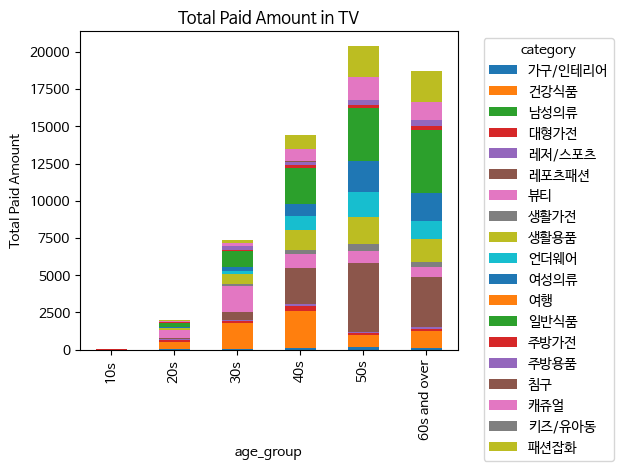

In [48]:
# 모바일 채널에서 연령대별 구매 확인하기 위해
order_chtv = df[df['channel'] == 'TV']

# 도시별로 개별 변수에 대한 카테고리별 취소된 주문의 총 수를 계산합니다.
order_chtv_count = order_chtv.groupby(['age_group'])['item_category'].value_counts()

# 막대 그래프로 시각화합니다.
plt.figure(figsize=(12, 8))
order_chtv_count.unstack().plot(kind="bar", stacked=True)

plt.xlabel("age_group")
plt.ylabel("Total Paid Amount")
plt.title("Total Paid Amount in TV")
plt.legend(title='category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [49]:
# 고객 번호에서 연도 정보 추출
df['customer_no'] = df['customer_no'].astype(str)
df['customer_joinyear'] = df['customer_no'].str[:4]

# 각 연도별 구매 건수 계산
purchase_count_by_year = df.groupby('customer_joinyear').size()

# 결과 출력
df.head()

,customer_no,age,gender,order_no,order_date,month,day,weekday,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,discount_rate,age_group,customer_joinyear
0,2021059651101,68.0,9,202106072433746,2021-06-07,6,7,Monday,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910,10.000000,60s and over,2021
1,2018069800502,49.0,2,202105311957155,2021-05-31,5,31,Monday,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000,2.564103,40s,2018
2,2019073300103,35.0,1,202105138020462,2021-05-13,5,13,Thursday,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,19.166667,30s,2019
3,2020075283364,41.0,9,202106171444319,2021-06-17,6,17,Thursday,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080,30.638655,40s,2020
4,2020104780765,46.0,1,202106024431989,2021-06-02,6,2,Wednesday,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610,4.989107,40s,2020


In [50]:
print(purchase_count_by_year)

customer_joinyear
2015      282
2016     1897
2017     6575
2018    28807
2019    39234
2020    46046
2021    24470
dtype: int64


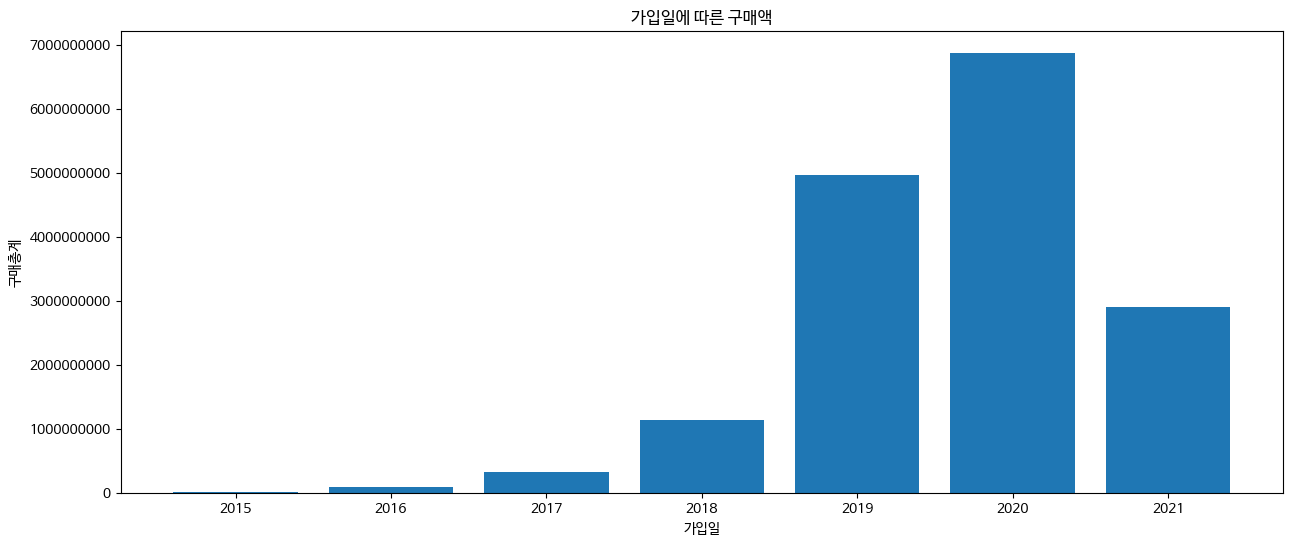

In [51]:
# 요일별 고객 결제 금액을 보기 위해 막대그래프 시각화
df_bar_join = df.groupby('customer_joinyear')['paid_amount'].sum().reset_index()

## 그림의 크기 설정
plt.figure(figsize=(15, 6))

## 막대 그래프로 요일별 거래액 표현
plt.bar(df_bar_join['customer_joinyear'], df_bar_join['paid_amount'])

## 그래프 타이틀 및 축 레이블
plt.title('가입일에 따른 구매액')
plt.xlabel('가입일')
plt.ylabel('구매총계')

# y 축 값을 지수 형태가 아닌 전체 자릿수가 보이는 형태로 표시
plt.ticklabel_format(axis='y', style='plain')

## x 축에 연도 값 표시
plt.xticks(df_bar_join['customer_joinyear'])

## 그래프 출력
plt.show()

*   2015~2017년 사이 고객들은 구매가 저조하여 매출증대 방안 필요
*   2019년, 2020년 가입 고객들이 활발하게 구매를 하고 있는 것을 알 수 있음




<Figure size 1200x800 with 0 Axes>

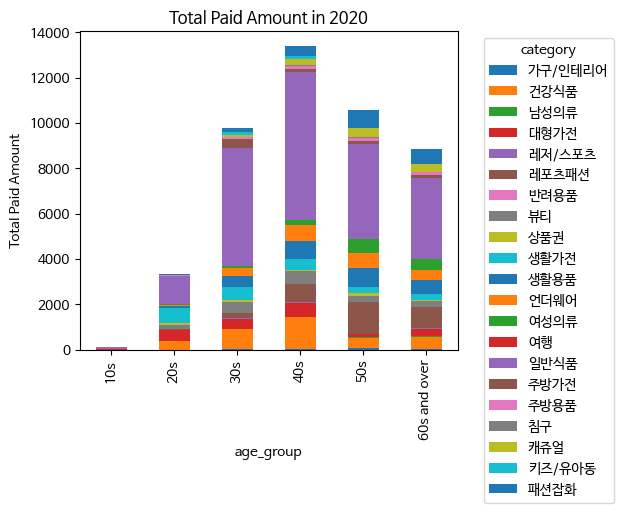

In [52]:
# 모바일 채널에서 연령대별 구매 확인하기 위해
order_join20 = df[df['customer_joinyear'] == '2020']

# 도시별로 개별 변수에 대한 카테고리별 취소된 주문의 총 수를 계산합니다.
order_join20_count = order_join20.groupby(['age_group'])['item_category'].value_counts()

# 막대 그래프로 시각화합니다.
plt.figure(figsize=(12, 8))
order_join20_count.unstack().plot(kind="bar", stacked=True)

plt.xlabel("age_group")
plt.ylabel("Total Paid Amount")
plt.title("Total Paid Amount in 2020")
plt.legend(title='category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

*   구매가 가장 활발한 2020년 가입 고객들을 분석했을 때 일반식품을 가장 많이 구매한 것으로 나타남
*   연령대별로 40대가 가장 많이 구매액을 지불하였음



In [53]:
# 고객 단위 아이템 카테고리별 구매 건수 합계
user_item_purchase = df.groupby(['customer_no', 'item_category'])['order_no'].nunique().reset_index()
user_item_purchase.head()

,customer_no,item_category,order_no
0,2015010000596,생활가전,1
1,2015010000596,일반식품,1
2,2015010000652,일반식품,1
3,2015010001152,건강식품,1
4,2015010001152,일반식품,5


In [54]:
# pivot table 생성
purchase_info = user_item_purchase.pivot_table(index='customer_no', columns='item_category', values='order_no', fill_value=0)
purchase_info.head()

item_category,가구/인테리어,건강식품,남성의류,대형가전,레저/스포츠,레포츠패션,반려용품,뷰티,상품권,생활가전,...,언더웨어,여성의류,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈/유아동,패션잡화
customer_no,,,,,,,,,,,,,,,,,,,,,
2015010000596,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2015010000652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2015010001152,0,1,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
2015010001213,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015010001954,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
# pivot table을 데이터프레임으로 변환
purchase_info = pd.DataFrame(purchase_info.to_records())

In [56]:
# customer_no 제거
purchase_info2 = purchase_info.drop('customer_no', axis = 1)
purchase_info2.head()

,가구/인테리어,건강식품,남성의류,대형가전,레저/스포츠,레포츠패션,반려용품,뷰티,상품권,생활가전,...,언더웨어,여성의류,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈/유아동,패션잡화
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [57]:
# 클러스터링 분석에 필요한 패키지 설치 및 임포트
# 데이터 표준화도 진행
!pip install yellowbrick
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(purchase_info2)

In [58]:
# 컬럼명 결합
customer_clustering_sc = pd.DataFrame(data=customer_clustering_sc, columns=purchase_info2.columns)
customer_clustering_sc.head()

kmeans = KMeans(n_clusters = 4, random_state = 0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering_sc["cluster"] = clusters.labels_
print(customer_clustering_sc["cluster"].unique())
customer_clustering_sc.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 2 1 3]


,가구/인테리어,건강식품,남성의류,대형가전,레저/스포츠,레포츠패션,반려용품,뷰티,상품권,생활가전,...,여성의류,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈/유아동,패션잡화,cluster
0,-0.081169,-0.097453,-0.039155,-0.042429,-0.047326,-0.355922,-0.018836,-0.017251,-0.010917,0.531743,...,-0.235183,-0.007451,0.025647,-0.052834,-0.120768,-0.048957,-0.212052,-0.063,-0.215729,0
1,-0.081169,-0.097453,-0.039155,-0.042429,-0.047326,-0.355922,-0.018836,-0.017251,-0.010917,-0.042025,...,-0.235183,-0.007451,0.025647,-0.052834,-0.120768,-0.048957,-0.212052,-0.063,-0.215729,0
2,-0.081169,0.693364,-0.039155,-0.042429,-0.047326,-0.355922,-0.018836,-0.017251,-0.010917,-0.042025,...,-0.235183,-0.007451,1.566084,-0.052834,-0.120768,-0.048957,-0.212052,-0.063,-0.215729,0
3,-0.081169,0.693364,-0.039155,-0.042429,-0.047326,-0.355922,-0.018836,-0.017251,-0.010917,-0.042025,...,-0.235183,-0.007451,-0.359462,-0.052834,-0.120768,-0.048957,-0.212052,-0.063,-0.215729,0
4,-0.081169,-0.097453,-0.039155,-0.042429,-0.047326,-0.355922,-0.018836,-0.017251,-0.010917,-0.042025,...,2.872127,-0.007451,-0.359462,-0.052834,-0.120768,-0.048957,-0.212052,-0.063,-0.215729,2


In [59]:
# 클러스터 결과 분석 -> 그룹 0이 가장 많은 67,316명 고객이 있으며 그룹 2가 4,739명으로 2번째임.
customer_clustering_sc.groupby("cluster").count()

,가구/인테리어,건강식품,남성의류,대형가전,레저/스포츠,레포츠패션,반려용품,뷰티,상품권,생활가전,...,언더웨어,여성의류,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈/유아동,패션잡화
cluster,,,,,,,,,,,,,,,,,,,,,
0,67316,67316,67316,67316,67316,67316,67316,67316,67316,67316,...,67316,67316,67316,67316,67316,67316,67316,67316,67316,67316
1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,...,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [60]:
customer_clustering_sc.groupby("cluster").mean()

,가구/인테리어,건강식품,남성의류,대형가전,레저/스포츠,레포츠패션,반려용품,뷰티,상품권,생활가전,...,언더웨어,여성의류,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈/유아동,패션잡화
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.004965,0.006316,-0.000199,0.002990,0.002854,0.018206,0.001062,-0.002716,0.000769,0.002842,...,0.013154,-0.235183,-0.007451,0.022278,0.003400,0.005345,0.002085,0.009131,0.004124,0.010720
1,-0.081169,0.297956,-0.039155,-0.042429,-0.047326,-0.355922,-0.018836,-0.017251,-0.010917,0.101417,...,-0.236415,-0.235183,134.216243,1.084697,-0.052834,4.414172,-0.048957,-0.212052,-0.063000,-0.215729
2,-0.070436,-0.090110,0.002872,-0.042429,-0.040491,-0.258233,-0.015067,-0.015063,-0.010917,-0.040451,...,-0.186604,3.340944,-0.007451,-0.317367,-0.048236,-0.079620,-0.029558,-0.129482,-0.058515,-0.152048
3,-0.081169,0.693364,-0.039155,-0.042429,-0.047326,-0.355922,-0.018836,254.283779,-0.010917,-0.042025,...,-0.236415,-0.235183,-0.007451,0.025647,-0.052834,-0.120768,-0.048957,-0.212052,-0.063000,-0.215729


In [61]:
# k-means 클러스터링 모델 생성
kmeans_model_1 = KMeans(
    init="k-means++",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=37
)

kmeans_model_1.fit(customer_clustering_sc)

# 최저 SSE 값
print(kmeans_model_1.inertia_)

# 각 군집의 중심점 좌표 확인
print(kmeans_model_1.cluster_centers_)


# 반복 횟수
print(kmeans_model_1.n_iter_)

1273832.2020212763
[[-8.11685247e-02  6.28918616e-03  1.42236107e-04 -3.21469579e-04
   2.39249858e-03  2.13516253e-02  1.23657152e-03 -2.61227278e-03
   8.71771183e-04 -7.51210196e-03  1.26399964e-02  1.50833815e-02
  -2.35182695e-01  5.94994578e-04  2.49489193e-02 -2.48417341e-02
   6.17840724e-03  2.35978397e-03  1.07148056e-02  4.64881757e-03
   1.24290718e-02  5.99421559e-05]
 [-8.11685247e-02 -8.99388303e-02  2.89847423e-03 -4.24290184e-02
  -4.04865120e-02 -2.58171318e-01 -1.50650108e-02  3.85865286e-02
  -1.09165252e-02 -4.05715950e-02 -1.60884963e-01 -1.86572509e-01
   3.33992889e+00 -7.45066301e-03 -3.18397671e-01 -4.82332252e-02
  -7.95936079e-02 -2.95461311e-02 -1.29429484e-01 -5.85118726e-02
  -1.52980187e-01  2.00021115e+00]
 [ 1.09964904e+01  2.38656422e-02 -3.91546907e-02 -3.80471821e-02
  -3.50696638e-03 -3.38979188e-01 -1.88360256e-02 -1.38350699e-02
  -1.09165252e-02 -2.57251578e-02 -1.28642327e-01 -2.03702249e-01
  -2.05757418e-01 -7.45066301e-03 -2.52973379e-01 -4.

/usr/local/lib/python3.10/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.10/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


<Axes: >

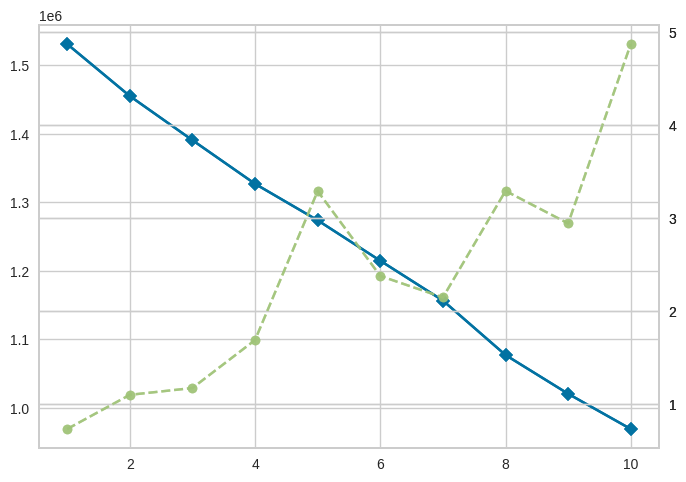

In [62]:
# 엘보우 차트 시각화
Elbow_Chart = KElbowVisualizer(kmeans_model_1, k=(1, 11),)
Elbow_Chart.fit(customer_clustering_sc)
Elbow_Chart.draw()

In [63]:
# k-means 모델 설정
kmeans_model_2 = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 37,
    }

kmeans_model_3 = KMeans(
    init="k-means++",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=37)

# 군집 결합
purchase_info['cluster1'] = kmeans_model_3.fit_predict(customer_clustering_sc)
purchase_info.head()


,customer_no,가구/인테리어,건강식품,남성의류,대형가전,레저/스포츠,레포츠패션,반려용품,뷰티,상품권,...,여성의류,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈/유아동,패션잡화,cluster1
0,2015010000596,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2015010000652,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2015010001152,0,1,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,0
3,2015010001213,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015010001954,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [67]:
# 클러스터별 EDA 수행
cluster_summary = purchase_info.groupby('cluster1').agg(
    uu = ('customer_no','count'),
    가구인테리어 = ('가구/인테리어','mean'),
    건강식품 = ('건강식품','mean'),
    남성의류 = ('남성의류','mean'),
    대형가전 = ('대형가전','mean'),
    레저스포츠 = ('레저/스포츠','mean'),
    레포츠패션 = ('레포츠패션','mean'),
    반려용품 = ('반려용품','mean'),
    뷰티 = ('뷰티','mean'),
    상품권 = ('상품권','mean'),
    생활가전 = ('생활가전','mean'),
    생활용품 = ('생활용품','mean'),
    언더웨어 = ('언더웨어','mean'),
    여성의류 = ('여성의류','mean'),
    여행 = ('여행','mean'),
    일반식품 = ('일반식품','mean'),
    주방가전 = ('주방가전','mean'),
    주방용품 = ('주방용품','mean'),
    침구 = ('침구','mean'),
    캐쥬얼 = ('캐쥬얼','mean'),
    키즈유아동 = ('키즈/유아동','mean'),
    패션잡화 = ('패션잡화','mean')
)

In [69]:
# 데이터프레임 병합
cluster_df = pd.merge(df, purchase_info[['customer_no', 'cluster1']], on='customer_no', how='inner')

cluster_df.head()

,customer_no,age,gender,order_no,order_date,month,day,weekday,channel,item_category,...,item_name,price,qty,order_amount,discount_amount,paid_amount,discount_rate,age_group,customer_joinyear,cluster1
0,2021059651101,68.0,9,202106072433746,2021-06-07,6,7,Monday,TV,캐쥬얼,...,밴딩팬츠,49900,1,49900,4990,44910,10.000000,60s and over,2021,0
1,2018069800502,49.0,2,202105311957155,2021-05-31,5,31,Monday,TV,레포츠패션,...,트랙수트,39000,1,39000,1000,38000,2.564103,40s,2018,0
2,2019073300103,35.0,1,202105138020462,2021-05-13,5,13,Thursday,TV,뷰티,...,기초세트,72000,2,144000,27600,116400,19.166667,30s,2019,1
3,2019073300103,35.0,1,202105210823003,2021-05-21,5,21,Friday,TV,뷰티,...,기초세트,72000,2,144000,27600,116400,19.166667,30s,2019,1
4,2019073300103,35.0,1,202105294006443,2021-05-29,5,29,Saturday,TV,뷰티,...,기초세트,72000,2,144000,27600,116400,19.166667,30s,2019,1


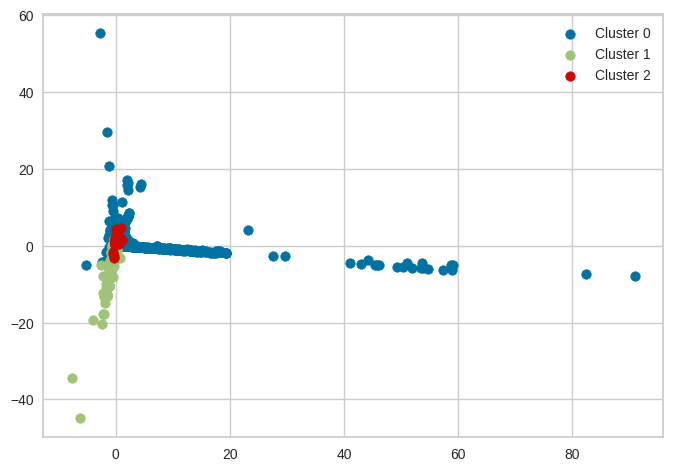

In [70]:
# PCA 수행
from sklearn.decomposition import PCA
X = customer_clustering_sc  # customer_clustering_sc 변수가 정의되어야 합니다.
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)

# 시각화
pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = purchase_info['cluster1']

for i in purchase_info["cluster1"].unique():
    tmp = pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp['PC1'], tmp['PC2'], label=f'Cluster {i}')

plt.legend()
plt.show()

In [71]:
item_category_summary = cluster_df.groupby(['cluster1', 'item_category'])['order_no'].nunique().reset_index()
item_category_summary.head()

,cluster1,item_category,order_no
0,0,건강식품,8754
1,0,남성의류,158
2,0,대형가전,5282
3,0,레저/스포츠,725
4,0,레포츠패션,11257


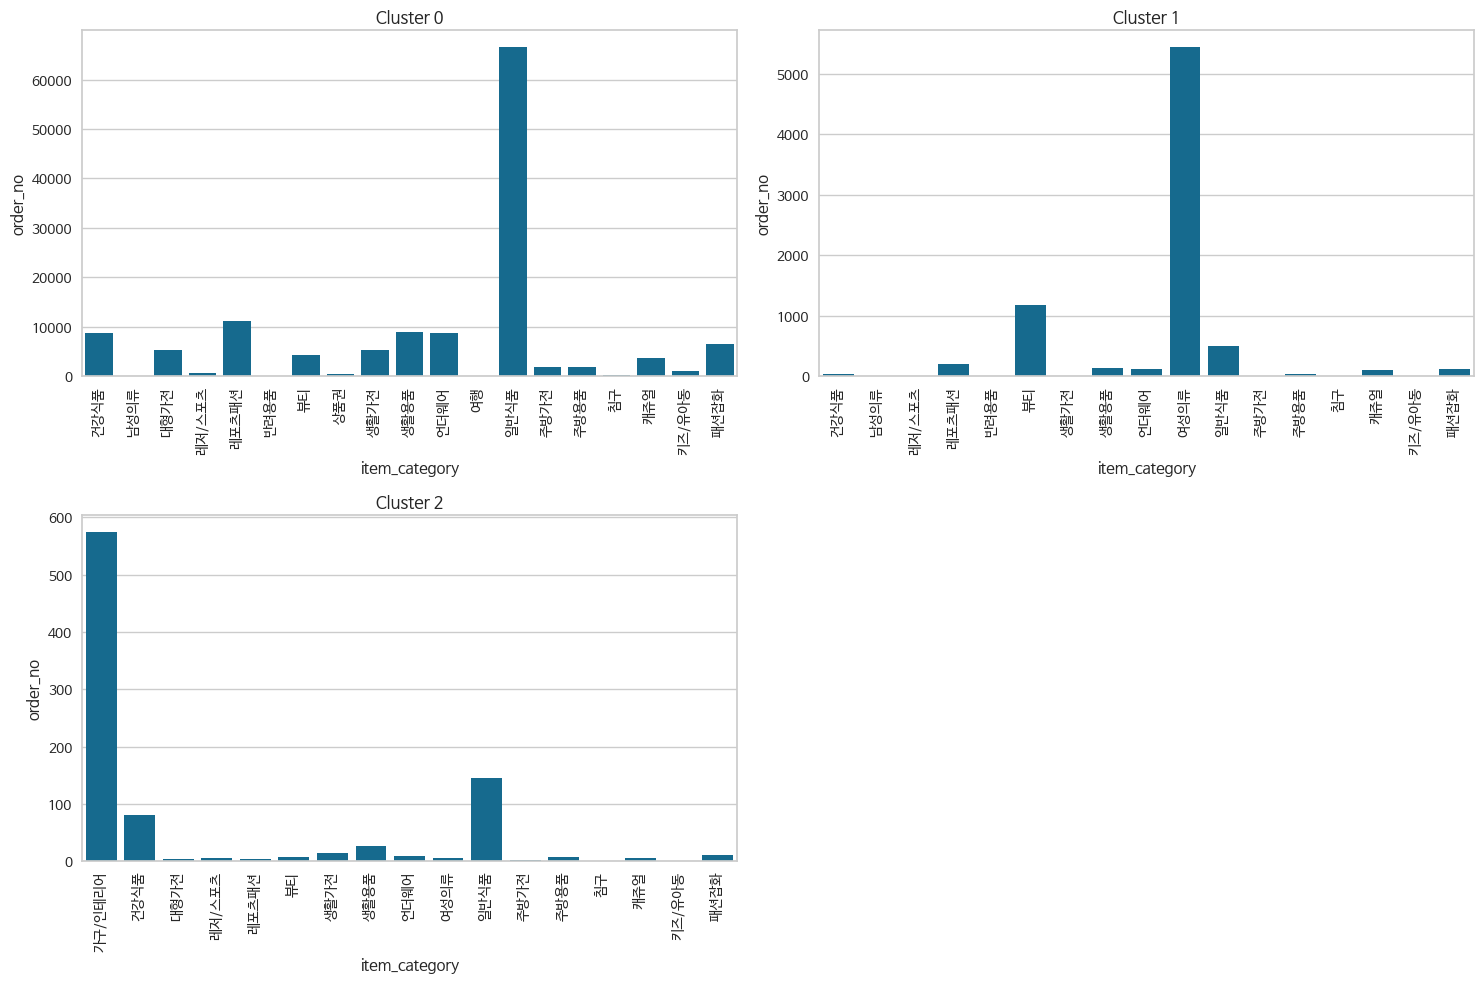

In [73]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumBarunGothic'

# 클러스터링 결과를 기반으로 각 클러스터별 선호하는 제품 카테고리 탐색

plt.figure(figsize=(15, 10))

for cluster_num in item_category_summary['cluster1'].unique():
    plt.subplot(2, 2, cluster_num + 1)

    sns.barplot(x='item_category', y='order_no', data=item_category_summary[item_category_summary['cluster1'] == cluster_num], dodge=True)

    plt.title(f'Cluster {cluster_num}')

    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



*   cluster0은 일반식품을 가장 선호함
*   cluster1은 여성의류를 가장 선호함
*   cluster2는 가구/인테리어를 가장 선호함



# **3. 해석 및 검증**

**1) 분석 종합**

* 월별 분류 및 분석
  - 5월에 고객 구매와 금액이 가장 많았음
  - 1월에 고객 결제금액이 가장 적었음
  
* 요일별 분류 및 분석
  - 수요일에 고객들이 많은 금액을 지불하였음을 알 수 있었음
  - 주말(토, 일)은 거의 수요일 구매액의 절반 정도였음

* 연령대별 분류 및 분석
  - 연령대별 전체 구매경향을 보면 40대의 구매가 많았으며, 50대, 30대, 60대 이상 순이었음.
  - 연령대별 구매방식을 살펴보면 10대, 20대, 30대, 40대는 모바일 구매를 선호하고, 50대와 60대 이상 TV 구매를 선호하는 경향이 있음

* 연도별 분류 및 분석
  - 2015~2017년 사이 고객들은 구매가 저조하여 매출증대 방안 필요
  - 2019년, 2020년 가입 고객들이 활발하게 구매를 하고 있는 것을 알 수 있음  
    - 2020년 가입 고객들을 분석했을 때 일반식품을 가장 많이 구매한 것으로 나타남
    - 2020년 기준으로 연령별 분석했을 때 40대가 가장 많이 구매액을 지불하였음

* 클러스터링 분류 및 분석
  - cluster0은 일반식품을 가장 선호함
  - cluster1은 여성의류를 가장 선호함
  - cluster2는 가구/인테리어를 가장 선호함


**2) 결론**

*   분석 목표인 고객 추가 유도 방안을 마련하게 위해 다음과 같은 결론을 내림
  - 수요일, 토요일, 일요일에 사용하기 위한 할인쿠폰을 배포해야 함
     - 고객들은 수요일에 가장 구매가 많고 주말에는 절반 정도 구매를 하기 때문에 수요일은 10%, 주말은 반값 세일 쿠폰을 지불하여 구매를 유도해야 매출액이 상승될 것으로 봄
  - 활발하게 활동 중인 2018-2021년 가입고객보다 2015-2017년 가입고객에 중점 맞춰야 함.
     - 2015-2017년 가입 고객들의 대부분 구매가 저조해 클러스터링 분석을 했을때 나타난 일반식품,  여성의류, 가구/인테리어 아이템들을 중심으로 할인 판매가 필요
  - 제일 구매액과 수가 많은 40대와 가장 연령대 중 숫자가 많은 50대를 중심으로 프로모션이 필요
     - 40대는 모바일 이용이 많고, 50대는 TV 이용으로 구매하는 경향이 있으므로, 다른 방식을 사용하여 추가 구매를 유도해야 함.


